# Esquema para una Super-Plantilla DW (Ultra-bright)

## 1. Cargar librerías necesarias

In [1]:
# librerías de terceros
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_profiling import ProfileReport

In [2]:

# ! pip install xlrd

In [3]:
# ajustes para ver mejor todo:
pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', '{:.3f}'.format)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth',None)
# por si nos hace falta matplotlib
%matplotlib inline

## 2. Cargar el dataset

In [5]:
df_train = pd.read_csv("./mascotas/train.csv")
#df_test = pd.read_csv("./mascotas/test.csv")
df_train

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me.",3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience waiting for her good master, plz call or sms for more details if you really get interested, thanks!!",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,"This handsome yet cute boy is up for adoption. He is the most playful pal we've seen in our puppies. He loves to nibble on shoelaces , Chase you at such a young age. Imagine what a cute brat he will be when he grows. We are looking for a loving home for Hunter , one that will take care of him and give him the love that he needs. Please call urgently if you would like to adopt this cutie.",850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgently. It about 1 1/2 months old. My cat got pregnant before we got the chance to get its muted. The kittens are healthy and are eating kittens biscuits now. They are very playful and love being pat I prefer the kittens to be going to the same home but I do understands and its can be adopt separately. I'm hopping the kittens will get a lovely home soon,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and Eddie(male cat- white and cream) is 1 years plus. Both are toilet train and can't be separated. Needs a loving home together.,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love humans. Very friendly.",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,1,1,1,1,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..she just hates cages..but loves climbing trees and rooftops..however she is very loving.,e4da1c9e4,3.0,4


In [6]:
# eliminamos las columnas no deseadas de train y test
#columnas = ['Name','RescuerID','Description','PetID']
#df_train.drop(columnas,axis = 1,inplace=True)
#df_test.drop(columnas,axis=1,inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Age            14993 non-null  int64  
 2   Breed1         14993 non-null  int64  
 3   Breed2         14993 non-null  int64  
 4   Gender         14993 non-null  int64  
 5   Color1         14993 non-null  int64  
 6   Color2         14993 non-null  int64  
 7   Color3         14993 non-null  int64  
 8   MaturitySize   14993 non-null  int64  
 9   FurLength      14993 non-null  int64  
 10  Vaccinated     14993 non-null  int64  
 11  Dewormed       14993 non-null  int64  
 12  Sterilized     14993 non-null  int64  
 13  Health         14993 non-null  int64  
 14  Quantity       14993 non-null  int64  
 15  Fee            14993 non-null  int64  
 16  State          14993 non-null  int64  
 17  VideoAmt       14993 non-null  int64  
 18  PhotoA

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          3972 non-null   int64  
 1   Age           3972 non-null   int64  
 2   Breed1        3972 non-null   int64  
 3   Breed2        3972 non-null   int64  
 4   Gender        3972 non-null   int64  
 5   Color1        3972 non-null   int64  
 6   Color2        3972 non-null   int64  
 7   Color3        3972 non-null   int64  
 8   MaturitySize  3972 non-null   int64  
 9   FurLength     3972 non-null   int64  
 10  Vaccinated    3972 non-null   int64  
 11  Dewormed      3972 non-null   int64  
 12  Sterilized    3972 non-null   int64  
 13  Health        3972 non-null   int64  
 14  Quantity      3972 non-null   int64  
 15  Fee           3972 non-null   int64  
 16  State         3972 non-null   int64  
 17  VideoAmt      3972 non-null   int64  
 18  PhotoAmt      3972 non-null 

### 2.1. Si falla la carga, utilizar chardet para la codificación correcta del dataset

### 2.2. En caso de tener muchos ficheros a cargar

## 3. Realizar el EDA automático

### 3.1. Pandas-Profiling

In [8]:
# en caso de que el fichero se muy grande
# df = df.sample(int(len(df)/10))

### 3.2. DTale

### 3.3. Crear un EDA Personal

## 4. DW

### 4.1. Obtenemos Info() para saber qué tipo ha asignado a cada columna

#### 4.1.1. Si Pandas no reconoce correctamente el tipo de alguna columna, resolver.

#### 4.1.2. Eliminación de columnas irrelevantes o que no se podrá sacar información posteriormente

#### 4.1.3. Eliminación de filas duplicadas si es necesario y conveniente

### 4.2. Separamos columnas numéricas de categóricas en listas distintas. Separamos en otra lista las columnas temporales. Incluso las booleanas.

Para determinar si OneHot o LabelEncoding, buscar los valores únicos de las columnas categóricas y decidid: Maximo Label Encoding (hasta 5, siempre y cuando se "orienten" los valores por conocimiento del negocio)

#### 4.2.1 (Opcional) Eliminar todos los elementos no deseados, convertir a númerico (OneHot, LabelEncoding) y realizar un Feature Importances preeliminar

In [9]:
#! pip install sklearn

In [10]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
# Feature importances
# prefijos = ['Nac', 'Club', 'P_Club', 'L_Club', 'Pos']

def F_importances(X,y):
    # Construye un arbol para así conocer la importancia de las columnas
    forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
    columnas = X.columns.to_list()
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, columnas[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,10))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])


#F_importances(df_num.drop(["Value"],axis = 1),df_num['Value'])

#### 4.2.2 (Opcional) En caso contrario hacer una matriz de correlación con el target

### 4.3. Determinamos si tenemos pocos datos. En ese caso, buscaríamos nuevos conjuntos de datos (scrapping, otras fuentes) y los unimos (merge, concat) con los que tenemos (por filas o por columnas)

#### 4.3.1 Convertimos la columna Preferred Positions en una serie de columnas One hot

### 4.4. Extraemos información necesaria del EDA automático, DTale o del nuestro:
#### - Nulos por columna

#### - % valores únicos por filas y columnas

#### - Número de elementos por categoría en cada una de las columnas categóricas

#### - Filas duplicadas

#### - (Opcional) Eliminar todos los elementos no deseados, convertir a númerico (OneHot, LabelEncoding) y realizar un Feature Importances preeliminar

### 4.5 Limpieza de nulos

En este caso no aplica por no haber nulos

#### - Estrategia: Eliminación "con violencia" de filas o columnas con nulos

#### - Estrategia: rellenado valor fijo (con 0s, etc)

#### - Estrategia: media, mediana, moda (valor más frecuente en categóricos)

#### - Estrategia: valores extremos de la distribución

#### - Estrategia: valores aleatorios dentro del rango de valores de la columna

#### - Estrategia: ML

### 4.6 Análisis y corrección de distribuciones

##### Aquí podemos elegir la columna sobre la cual realizar el estudio, en cada una de las posibilidades se hagan 

##### Esto lo iremos repitiendo con todas las columnas numéricas y al final dejaremos esas columnas y no las originales cuando vayan al dataset

### 4.7 Tratamiento de outliers

#### 4.7.1. Detección de Outliers: Graficos Box-plot / Simetría y kurtosis

#### 4.7.2. Tratamiento si es necesario

### 4.8 Agrupamiento de categorias con pocas filas asociadas (categorias raras)

En este caso, no ha lugar a agrupar categorías

### 4.9 Correlaciones multivariable (numéricas)

### 4.10 Seleccion de características / reducción de dimensionalidad

### 4.11 Ingeniería de características

Este apartado está muy ligado a los datos, por lo que se rellenará con lo que se estime en cada dataset. Sólo se presentan ciertos apartados para ser trabajados si son necesarios.

#### - Fechas

#### - Crear columnas

#### - Agregaciones varias

#### - Label encoding dirigido a resultados

#### - Creación de columnas que indican existencia de nulos o valores raros

#### - Expansión polinómica (Estricta / No estricta)

#### - Eliminación de columnas definitivamente

### 4.12 Conversión categóricas a numéricas

#### - Label Encoding

##### - One Hot

### 4.13 Separar Target de Características

In [11]:
target ="AdoptionSpeed"

X_train = df_train.drop([target],axis = 1)
y = df_train[target]

In [12]:
X_train

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,2,266,0,3,1,0,0,2,2,2,2,2,1,4,0,41326,0,3.0
14989,2,60,265,264,3,1,4,7,2,2,1,1,1,1,2,0,41326,0,3.0
14990,2,2,265,266,3,5,6,7,3,2,2,1,3,1,5,30,41326,0,5.0
14991,2,9,266,0,2,4,7,0,1,1,1,1,1,1,1,0,41336,0,3.0


### 4.14 Volver a aplicar Correlaciones y Feature Importances (sin estandarizado)

### 4.15 Aplicar Estandarización

In [13]:
def estandarizar(dataframe):
    media = dataframe.mean()
    desviacion_estandar = dataframe.std()
    return (dataframe - media)/desviacion_estandar

X = estandarizar(X_train)
X

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,1.088656,-0.410452,0.561592,-0.601649,-1.138749,-0.707173,1.377239,-0.630683,-1.573115,-0.780351,0.402595,0.634179,0.151497,-0.183512,-0.391224,1.004151,-0.617318,-0.163958,-0.828375
1,1.088656,-0.520610,-0.004539,-0.601649,-1.138749,-0.707173,-0.445874,-0.630683,0.251840,0.888903,1.900387,2.071339,1.917745,-0.183512,-0.391224,-0.271123,1.694347,-0.163958,-0.541662
2,-0.918503,-0.520610,0.694799,-0.601649,-1.138749,-0.134181,1.377239,-0.630683,0.251840,0.888903,-1.095198,-0.802981,0.151497,-0.183512,-0.391224,-0.271123,-0.617318,-0.163958,0.891902
3,-0.918503,-0.355373,0.694799,-0.601649,0.328404,-0.707173,-0.445874,-0.630683,0.251840,-0.780351,-1.095198,-0.802981,0.151497,-0.183512,-0.391224,1.641787,1.694347,-0.163958,1.178615
4,-0.918503,-0.520610,0.694799,-0.601649,-1.138749,-0.707173,-1.175119,-0.630683,0.251840,-0.780351,0.402595,0.634179,0.151497,-0.183512,-0.391224,-0.271123,-0.617318,-0.163958,-0.254949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,1.088656,-0.465531,0.012112,-0.601649,1.795557,-0.707173,-1.175119,-0.630683,0.251840,0.888903,0.402595,0.634179,0.151497,-0.183512,1.646159,-0.271123,-0.617318,-0.163958,-0.254949
14989,1.088656,2.729042,-0.004539,1.544491,1.795557,-0.707173,0.283371,1.715094,0.251840,0.888903,-1.095198,-0.802981,-1.614751,-0.183512,0.287903,-0.271123,-0.617318,-0.163958,-0.254949
14990,1.088656,-0.465531,-0.004539,1.560750,1.795557,1.584795,1.012616,1.715094,2.076794,0.888903,0.402595,-0.802981,1.917745,-0.183512,2.325286,0.111459,-0.617318,-0.163958,0.318476
14991,1.088656,-0.079979,0.012112,-0.601649,0.328404,1.011803,1.377239,-0.630683,-1.573115,-0.780351,-1.095198,-0.802981,-1.614751,-0.183512,-0.391224,-0.271123,-0.309096,-0.163958,-0.254949


### 4.16 (Opcional) Aplicar Feature Importances (con estandarizado)

In [14]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
# Feature importances
# prefijos = ['Nac', 'Club', 'P_Club', 'L_Club', 'Pos']

def F_importances(X,y):
    # Construye un arbol para así conocer la importancia de las columnas
    forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
    columnas = X.columns.to_list()
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, columnas[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,10))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])


#F_importances(df_num.drop(["Value"],axis = 1),df_num['Value'])

Feature ranking:
1. feature Age (0.126325)
2. feature PhotoAmt (0.119700)
3. feature Color1 (0.076102)
4. feature Breed1 (0.074262)
5. feature State (0.072327)
6. feature Color2 (0.072009)
7. feature MaturitySize (0.050375)
8. feature Breed2 (0.048562)
9. feature Fee (0.045926)
10. feature Quantity (0.043184)
11. feature Color3 (0.042107)
12. feature Sterilized (0.040879)
13. feature FurLength (0.039770)
14. feature Dewormed (0.039343)
15. feature Gender (0.038396)
16. feature Vaccinated (0.030229)
17. feature Health (0.014275)
18. feature VideoAmt (0.013882)
19. feature Type (0.012346)


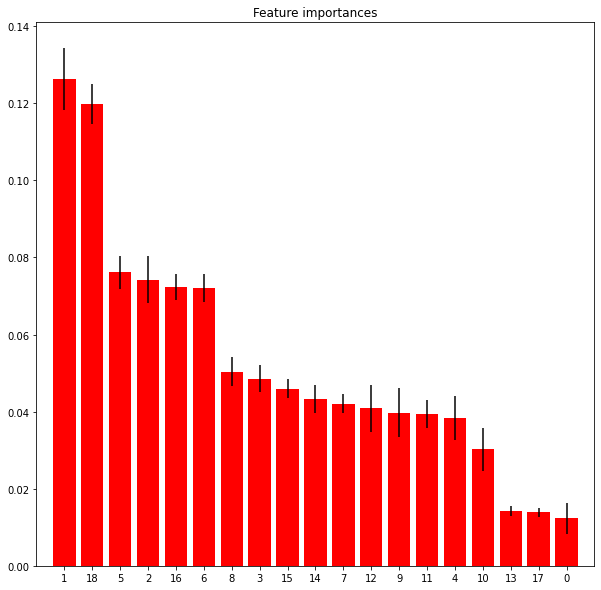

In [15]:
F_importances(X,y)

# (Opcional) Un vistazo a cómo se comportaría el Dataset

In [16]:
# cargamos algunas librerías de algoritmos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
# métricas clasificacion
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split


# cargamos algunas librerías de algoritmos de regresion
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# métricas regresion
from sklearn.metrics import r2_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, # los datos (features) nuestra X
    y,  # columna objetivo, nuestra y
    stratify=y,
    test_size=0.1,  # el 90% de las filas serán para entrenar y el 10% para probar si ha ido bien
    random_state=0) 

X_train.shape, X_test.shape

((13493, 19), (1500, 19))

In [18]:
# clasificacion

# Aquí deshabilitamos el modelo que necesitemos
#modelo = LogisticRegression(random_state=44)
#modelo = AdaBoostClassifier(n_estimators=200)
modelo = RandomForestClassifier(n_estimators=200, n_jobs=-1)

# Entrenamos modelo
modelo.fit(X_train, y_train)

# predicción sobre el conjunto de test
y_pred = modelo.predict(X_test)

# calculamos su acierto
print('Accuracy: {}'.format(modelo.score(X_test, y_test)))
#print('roc-auc: {}'.format(roc_auc_score(y_test, y_pred)))

Accuracy: 0.406
